In [52]:
#import necccessary libraries
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix, classification_report
from gensim.models import Word2Vec


In [53]:
#Load fake dataset
fake = pd.read_csv("Fake.csv")
#Load true dataset
true = pd.read_csv("True.csv")

**Data Exploration**

In [54]:
#first rows of the fake news dataset
fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [55]:
#first rows of the true news dataset
true.head() 

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [56]:
# information about the fake news dataset
fake.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB


In [57]:
# information about the real news dataset
true.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB


In [58]:
#describing the fake news dataset
fake.describe()

,title,text,subject,date
count,23481,23481,23481,23481
unique,17903,17455,6,1681
top,MEDIA IGNORES Time That Bill Clinton FIRED His...,,News,"May 10, 2017"
freq,6,626,9050,46


In [59]:
#describing the true dataset
true.describe()

,title,text,subject,date
count,21417,21417,21417,21417
unique,20826,21192,2,716
top,Factbox: Trump fills top jobs for his administ...,(Reuters) - Highlights for U.S. President Dona...,politicsNews,"December 20, 2017"
freq,14,8,11272,182


In [60]:
#checking the variable in fake news dataset
fake.columns

Index(['title', 'text', 'subject', 'date'], dtype='object')

In [61]:
#Checking the variable in true news dataset
true.columns

Index(['title', 'text', 'subject', 'date'], dtype='object')

**Data Processing**

In [62]:
# Checking for duplicate values in the fake news dataset
fake.duplicated().sum()

3

In [63]:
# Dropping the duplicat values in the fake news dataset
fake.drop_duplicates(inplace=True)

In [64]:
# Checking for duplicate values in the real news dataset
true.duplicated().sum()

206

In [65]:
# Dropping the duplicate value in the real news dataset
true.drop_duplicates(inplace=True)

In [66]:
# Creating a new column in both dataset that identifies a row has real news or fake
# 0-real news
# 1- fake news
true['category'] = 0
fake['category'] = 1


In [67]:
# Combining the fake and true datasets
news = pd.concat([true,fake],axis=0,ignore_index=True)
# previewing the new dataset
news.head()


,title,text,subject,date,category
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",0
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",0
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",0
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",0
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",0


In [68]:
# Dropping columns not to be used
news.drop(['title','subject','date'],axis=1,inplace=True)

In [69]:
# Removing all punctuations
news['text'] = news['text'].map(lambda x: re.sub('[-,\.!?]', '', x))

In [70]:
# Converting the text data to lower case
news['text'] = news['text'].map(lambda x: x.lower())


In [71]:
# Joining the different processed titles together.
long_string = ' '.join(news['text'])

**Data Visualization**

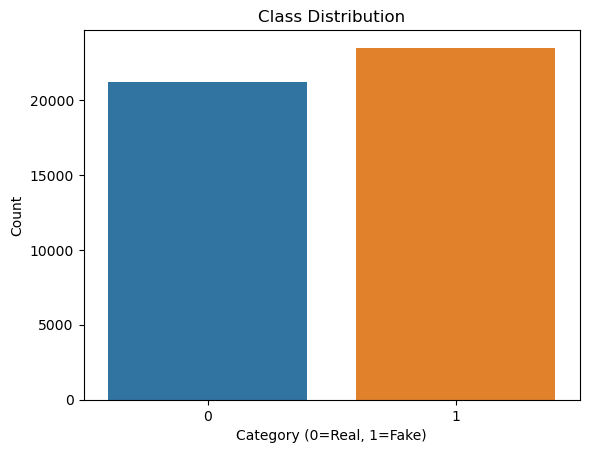

In [72]:
# Count plot for class distribution
sns.countplot(x='category', data=news)
plt.title('Class Distribution')
plt.xlabel('Category (0=Real, 1=Fake)')
plt.ylabel('Count')
plt.show()

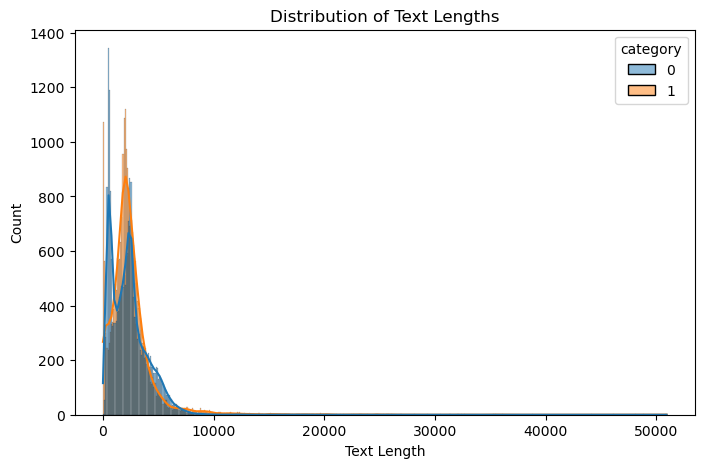

In [73]:
# Calculate text lengths
news['text_length'] = news['text'].apply(len)

# Plot the distribution of text lengths
plt.figure(figsize=(8, 5))
sns.histplot(news, x='text_length', hue='category', kde=True)
plt.title('Distribution of Text Lengths')
plt.xlabel('Text Length')
plt.ylabel('Count')
plt.show()

**Models**

In [74]:
# Defining the independent variable
X = news['text']

# Defining the dependent variable
y = news['category']

In [76]:
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [77]:
# Loading count vectorizer library
from sklearn.feature_extraction.text import CountVectorizer

# Instantiating count vectorizer
cv = CountVectorizer()

# Fitting and transforming X train 
X_train_vect = cv.fit_transform(X_train)

# Tranforming X test
X_test_vect = cv.transform(X_test)


In [78]:
# Instantiating logistic regression
logreg = LogisticRegression(random_state = 42)
logreg.fit(X_train_vect,y_train)



D:\py\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [79]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_vect, y_train)

RandomForestClassifier(random_state=42)

**Model Evaluation**

In [80]:
# Predicting the target variable for the training data using the trained logistic regression model
y_pred_log_reg = logreg.predict(X_train_vect)

In [81]:
# Predicting the target variable for the training data using the trained Random Forest model
y_pred_rf = rf_model.predict(X_train_vect)

In [82]:
#Compute Accuracy (Logistic regression)
accuracy = accuracy_score(y_train,y_pred_log_reg)
print("Accuracy:", accuracy)

Accuracy: 0.9999720287544405


In [83]:
# Compute precision, recall, and F1-score(Logistic regression)
precision = precision_score(y_train, y_pred_log_reg)
recall = recall_score(y_train, y_pred_log_reg)
f1 = f1_score(y_train, y_pred_log_reg)

print("Precision:", precision)
print("Recall :", recall)
print("F1-score :", f1)

Precision: 0.99994689607562
Recall : 1.0
F1-score : 0.9999734473327847


In [84]:
# Compute the confusion matrix(Logistic regression)
conf_matrix = confusion_matrix(y_train, y_pred_log_reg)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[16920     1]
 [    0 18830]]


In [85]:
# Generate the classification report(Logistic regression)
class_report = classification_report(y_train, y_pred_log_reg)
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     16921
           1       1.00      1.00      1.00     18830

    accuracy                           1.00     35751
   macro avg       1.00      1.00      1.00     35751
weighted avg       1.00      1.00      1.00     35751



In [86]:
# Compute accuracy(Random forest)
accuracy = accuracy_score(y_train, y_pred_rf)
print("Accuracy:", accuracy)

Accuracy: 0.9999720287544405


In [87]:
# Compute precision, recall, and F1-score(Random Forest)
precision = precision_score(y_train, y_pred_log_reg)
recall = recall_score(y_train, y_pred_log_reg)
f1 = f1_score(y_train, y_pred_log_reg)

print("Precision:", precision)
print("Recall :", recall)
print("F1-score :", f1)

Precision: 0.99994689607562
Recall : 1.0
F1-score : 0.9999734473327847


In [88]:
# Compute the confusion matrix(Random Forest)
conf_matrix = confusion_matrix(y_train, y_pred_rf)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[16920     1]
 [    0 18830]]


In [89]:
# Generate the classification report(Random Forest)
class_report = classification_report(y_train, y_pred_rf)
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     16921
           1       1.00      1.00      1.00     18830

    accuracy                           1.00     35751
   macro avg       1.00      1.00      1.00     35751
weighted avg       1.00      1.00      1.00     35751

